In [1]:
import sympy as sp

In [5]:
th12,th13,th23 = sp.symbols(r'\theta_{12} \theta_{13} \theta_{23}',real=True)
c12,c13,c23 = sp.cos(th12),sp.cos(th13),sp.cos(th23)
s12,s13,s23 = sp.sin(th12),sp.sin(th13),sp.sin(th23)
d = sp.symbols(r'\delta',real=True)
ep = sp.exp(sp.I*d)
em = sp.exp(-sp.I*d)

In [6]:
ep

exp(I*\delta)

In [38]:
V = sp.Matrix([
    [c12*c13,s12*c13,s13*em],
    [-s12*c23-c12*s23*s13*ep,c12*c23-s12*s23*s13*ep,s23*c13],
    [s12*s23-c12*c23*s13*ep,-c12*s23-s12*c23*s13*ep,c23*c13]
])
V

Matrix([
[                                                                    cos(\theta_{12})*cos(\theta_{13}),                                                                     sin(\theta_{12})*cos(\theta_{13}),   exp(-I*\delta)*sin(\theta_{13})],
[-exp(I*\delta)*sin(\theta_{13})*sin(\theta_{23})*cos(\theta_{12}) - sin(\theta_{12})*cos(\theta_{23}), -exp(I*\delta)*sin(\theta_{12})*sin(\theta_{13})*sin(\theta_{23}) + cos(\theta_{12})*cos(\theta_{23}), sin(\theta_{23})*cos(\theta_{13})],
[-exp(I*\delta)*sin(\theta_{13})*cos(\theta_{12})*cos(\theta_{23}) + sin(\theta_{12})*sin(\theta_{23}), -exp(I*\delta)*sin(\theta_{12})*sin(\theta_{13})*cos(\theta_{23}) - sin(\theta_{23})*cos(\theta_{12}), cos(\theta_{13})*cos(\theta_{23})]])

In [40]:
A = V.conjugate().T*V
for i in range(3):
    for j in range(3):
        A[i,j] = A[i,j].cancel().factor().simplify()
display(A)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [41]:
import numpy as np

In [43]:
import matplotlib.pyplot as plt

In [64]:
def alpha_s(Q2):
    return 4.0*np.pi/7.0/np.log(Q2/0.34**2.0)

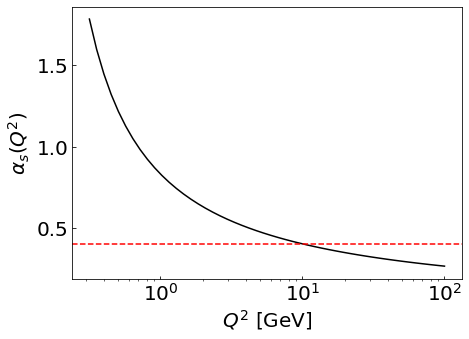

In [67]:
Q2 = np.logspace(-0.5,2)
alpha = alpha_s(Q2)

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5))
ax.plot(Q2,alpha,'k-')
ax.semilogx()
ax.set_xlabel(r'$Q^2~[{\rm GeV}]$',size=20)
ax.set_ylabel(r'$\alpha_s(Q^2)$',size=20)
ax.axhline(y=0.4,color='r',ls='--')
ax.tick_params(axis='both',which='major',direction='in',labelsize=20)

plt.show()